#📌 Extracción

In [1]:
import pandas as pd

# URL directa al JSON en GitHub
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Leer el JSON directamente desde internet
df = pd.read_json(url)

# Aplanar la estructura si está anidada
df_normalizado = pd.json_normalize(df.to_dict(orient="records"))

print(df_normalizado.head())


   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [2]:
# Ver primeras filas
df_normalizado.head()

# Ver columnas y tipos de datos
df_normalizado.info()

# Descripción estadística de columnas numéricas
df_normalizado.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


#🔧 Transformación

In [3]:
# Contar valores nulos por columna
df_normalizado.isnull().sum()

# También contar valores vacíos en texto
(df_normalizado == "").sum()


,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [4]:


# Normalizar vacíos a NA
df_normalizado['Churn'] = df_normalizado['Churn'].replace(['', ' ', 'NA', 'NaN', None], pd.NA)

# A) Eliminar sin etiqueta
df_clean = df_normalizado.dropna(subset=['Churn'])
# (forzar solo Yes/No)
df_clean = df_clean[df_clean['Churn'].isin(['Yes','No'])]

# Comprobar
df_clean['Churn'].isna().sum(), df_clean.shape


(np.int64(0), (7043, 21))

### **Se detectaron 224 registros sin valor en Churn (variable objetivo). Se eliminaron para asegurar la calidad del análisis, quedando 7,043 registros válidos.**

In [5]:
# Número total de filas duplicadas (todas las columnas iguales)
df_clean.duplicated().sum()
df_clean["customerID"].duplicated().sum()
# Número total de filas duplicadas (todas las columnas iguales)
print("Duplicados totales antes:", df_clean.duplicated().sum())
print("Duplicados en customerID antes:", df_clean["customerID"].duplicated().sum())

# Eliminar duplicados
df_clean = df_clean.drop_duplicates()  # todas las columnas
df_clean = df_clean.drop_duplicates(subset=["customerID"])  # por ID

# Verificar después de limpiar
print("Duplicados totales después:", df_clean.duplicated().sum())
print("Duplicados en customerID después:", df_clean["customerID"].duplicated().sum())


Duplicados totales antes: 0
Duplicados en customerID antes: 0
Duplicados totales después: 0
Duplicados en customerID después: 0


Se realizo busqueda y eliminado de duplicados, no se encontro ninguno

In [8]:
# Conversión de account.charges.Total a numérico (con verificación antes/después)

col = "account.Charges.Total"

print("=== ANTES ===")
print("dtype:", df_clean[col].dtype)
print("muestra de valores:", df_clean[col].astype(str).unique()[:10])

# Convertir a numérico; valores no convertibles -> NaN
df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

print("\n=== DESPUÉS ===")
print("dtype:", df_clean[col].dtype)
print(df_clean[col].describe())
n_nas = df_clean[col].isna().sum()
print("NaNs generados tras la conversión:", n_nas)



 # Imputar con la media:
df_clean[col].fillna(df_clean[col].mean(), inplace=True)

# Confirmación rápida
print("\nForma final del DataFrame:", df_clean.shape)


=== ANTES ===
dtype: object
muestra de valores: ['593.3' '542.4' '280.85' '1237.85' '267.4' '571.45' '7904.25' '5377.8'
 '340.35' '5957.9']

=== DESPUÉS ===
dtype: float64
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: account.Charges.Total, dtype: float64
NaNs generados tras la conversión: 11

Forma final del DataFrame: (7043, 21)


/tmp/ipython-input-2589365210.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)


In [9]:
# Columna a procesar
col = "account.Charges.Monthly"

print("=== ANTES ===")
print("dtype:", df_clean[col].dtype)
print("muestra de valores:", df_clean[col].astype(str).unique()[:10])

# Convertir a numérico; valores no convertibles -> NaN
df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

print("\n=== DESPUÉS ===")
print("dtype:", df_clean[col].dtype)
print(df_clean[col].describe())
n_nas = df_clean[col].isna().sum()
print("NaNs generados tras la conversión:", n_nas)

# Imputar con la media (sin FutureWarning)
df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# Confirmación rápida
print("\nForma final del DataFrame:", df_clean.shape)
print("NaNs tras imputar:", df_clean[col].isna().sum())


=== ANTES ===
dtype: float64
muestra de valores: ['65.6' '59.9' '73.9' '98.0' '83.9' '69.4' '109.7' '84.65' '48.2' '90.45']

=== DESPUÉS ===
dtype: float64
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: account.Charges.Monthly, dtype: float64
NaNs generados tras la conversión: 0

Forma final del DataFrame: (7043, 21)
NaNs tras imputar: 0


In [10]:
import re


# 1) Columnas categóricas
cat_cols = df_clean.select_dtypes(include="object").columns.tolist()

# 2) Limpieza básica: quitar espacios extra (inicio/fin y múltiples internos)
for c in cat_cols:
    df_clean[c] = (df_clean[c]
                   .astype(str)
                   .str.strip()
                   .str.replace(r"\s+", " ", regex=True))

# 3) Normalizar columnas Yes/No (y variantes "No internet/phone service")
yesno_cols = [
    "Churn",
    "phone.PhoneService","phone.MultipleLines",
    "internet.OnlineSecurity","internet.OnlineBackup",
    "internet.DeviceProtection","internet.TechSupport",
    "internet.StreamingTV","internet.StreamingMovies",
    "account.PaperlessBilling"
]

def norm_yes_no(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip().str.lower()
    s = s.replace({
        "y":"yes","n":"no","si":"yes","sí":"yes"  # por si acaso
    })
    s = s.replace({
        "yes":"Yes","no":"No",
        "no internet service":"No internet service",
        "no phone service":"No phone service"
    })
    return s

for c in yesno_cols:
    if c in df_clean.columns:
        df_clean[c] = norm_yes_no(df_clean[c])

# 4) Estandarizar casing de algunas categóricas multi-valor
title_cols = ["internet.InternetService","account.Contract","account.PaymentMethod"]
for c in title_cols:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].str.lower().str.title()

# 5) Resumen rápido para documentar
print("Valores únicos post-limpieza:")
for c in ["Churn","internet.InternetService","account.Contract","account.PaymentMethod",
          "phone.MultipleLines","internet.OnlineSecurity"]:
    if c in df_clean.columns:
        print(f"- {c} -> {sorted(df_clean[c].unique())}")

print("\nDistribución de Churn:")
print(df_clean["Churn"].value_counts(dropna=False))


Valores únicos post-limpieza:
- Churn -> ['No', 'Yes']
- internet.InternetService -> ['Dsl', 'Fiber Optic', 'No']
- account.Contract -> ['Month-To-Month', 'One Year', 'Two Year']
- account.PaymentMethod -> ['Bank Transfer (Automatic)', 'Credit Card (Automatic)', 'Electronic Check', 'Mailed Check']
- phone.MultipleLines -> ['No', 'No phone service', 'Yes']
- internet.OnlineSecurity -> ['No', 'No internet service', 'Yes']

Distribución de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [11]:
# Crear columna Cuentas_Diarias a partir de la facturación mensual
df_clean["Cuentas_Diarias"] = df_clean["account.Charges.Monthly"] / 30

# Vista rápida para verificar
print(df_clean[["account.Charges.Monthly", "Cuentas_Diarias"]].head())


   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


In [12]:
# Lista de columnas con valores Yes/No que queremos convertir a binario
cols_yes_no = [
    "Churn",
    "customer.Partner",
    "customer.Dependents",
    "phone.PhoneService",
    "phone.MultipleLines",
    "internet.OnlineSecurity",
    "internet.OnlineBackup",
    "internet.DeviceProtection",
    "internet.TechSupport",
    "internet.StreamingTV",
    "internet.StreamingMovies",
    "account.PaperlessBilling"
]

# Conversión Yes -> 1, No -> 0
df_clean[cols_yes_no] = df_clean[cols_yes_no].replace({"Yes": 1, "No": 0})

# Verificar cambios
print(df_clean[cols_yes_no].head())

# Confirmar tipos de datos
print("\nTipos después de la conversión:\n", df_clean[cols_yes_no].dtypes)


   Churn  customer.Partner  customer.Dependents  phone.PhoneService  \
0      0                 1                    1                   1   
1      0                 0                    0                   1   
2      1                 0                    0                   1   
3      1                 1                    0                   1   
4      1                 1                    0                   1   

  phone.MultipleLines internet.OnlineSecurity internet.OnlineBackup  \
0                   0                       0                     1   
1                   1                       0                     0   
2                   0                       0                     0   
3                   0                       0                     1   
4                   0                       0                     0   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                         0                    1                    1   


/tmp/ipython-input-1096079781.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[cols_yes_no] = df_clean[cols_yes_no].replace({"Yes": 1, "No": 0})


Transformaciones y Limpieza Realizadas
Normalización de valores nulos en Churn

Resumen de Transformaciones y Limpieza
Carga de datos desde archivo .json y conversión a DataFrame de Pandas.

Revisión de estructura y tipos de columnas (info(), describe()).

Limpieza inicial:

Normalización de vacíos (NA, espacios, valores nulos) en Churn.

Eliminación de registros sin etiqueta y filtrado solo "Yes"/"No".

Eliminación de duplicados generales y por customerID.

Conversión a numérico de account.Charges.Monthly y account.Charges.Total, imputando valores faltantes con la media.

Estandarización de categorías: Conversión de columnas "Yes"/"No" a binario 1/0.

Creación de Cuentas_Diarias dividiendo account.Charges.Monthly entre 30.

Resultado: Dataset limpio, consistente, sin valores nulos críticos y listo para análisis y modelado.

#📊 Carga y análisis

In [13]:
# --- Análisis Descriptivo ---

# 1) Resumen estadístico general (solo columnas numéricas)
print("=== Resumen estadístico general (numéricas) ===")
print(df_clean.describe().T)  # .T para verlo transpuesto y más legible

# 2) Mediana de cada columna numérica
print("\n=== Mediana de columnas numéricas ===")
print(df_clean.median(numeric_only=True))

# 3) Desviación estándar
print("\n=== Desviación estándar ===")
print(df_clean.std(numeric_only=True))

# 4) Distribución de clientes por Churn
print("\n=== Distribución de Churn ===")
print(df_clean["Churn"].value_counts(normalize=True) * 100)  # en porcentaje

# 5) Conteo de valores únicos por columna categórica
print("\n=== Valores únicos por columna categórica ===")
cat_cols = df_clean.select_dtypes(include="object").columns
for col in cat_cols:
    print(f"{col}: {df_clean[col].nunique()} valores únicos")

# 6) Correlaciones entre variables numéricas
print("\n=== Matriz de correlación ===")
print(df_clean.corr(numeric_only=True))


=== Resumen estadístico general (numéricas) ===
                           count         mean          std        min  \
Churn                     7043.0     0.265370     0.441561   0.000000   
customer.SeniorCitizen    7043.0     0.162147     0.368612   0.000000   
customer.Partner          7043.0     0.483033     0.499748   0.000000   
customer.Dependents       7043.0     0.299588     0.458110   0.000000   
customer.tenure           7043.0    32.371149    24.559481   0.000000   
phone.PhoneService        7043.0     0.903166     0.295752   0.000000   
account.PaperlessBilling  7043.0     0.592219     0.491457   0.000000   
account.Charges.Monthly   7043.0    64.761692    30.090047  18.250000   
account.Charges.Total     7043.0  2283.300441  2265.000258  18.800000   
Cuentas_Diarias           7043.0     2.158723     1.003002   0.608333   

                                 25%       50%       75%          max  
Churn                       0.000000     0.000     1.000     1.000000  
cust

Resumen del Análisis Descriptivo
Objetivo: Entender la distribución de los datos, magnitudes, y relaciones clave antes del modelado.

Acciones realizadas:

Calculamos métricas generales (media, mediana, desviación estándar, mínimos, máximos) para todas las variables numéricas.

Revisamos la distribución de Churn y la cantidad de valores únicos en columnas categóricas.

Calculamos la matriz de correlación para detectar relaciones entre variables.

Hallazgos principales
Churn: 26.5% de clientes se dieron de baja, 73.4% permanecen.

Antigüedad media (tenure): 32 meses; los clientes que permanecen tienden a tener mayor tiempo de servicio.

Senior Citizens: Solo el 16% de los clientes.

Facturación mensual: Promedio ≈ USD 64.76, con facturación total promedio ≈ USD 2,283.

Cuentas diarias: ≈ USD 2.16/día.

Correlaciones:

tenure tiene correlación negativa fuerte con Churn (-0.35) → a mayor antigüedad, menor probabilidad de baja.

PaperlessBilling y Charges.Monthly tienen correlación positiva con Churn (~0.19) → clientes con facturación electrónica o cargos más altos tienden a irse más.

Charges.Total se correlaciona fuertemente con tenure (0.82), lo que es esperable.



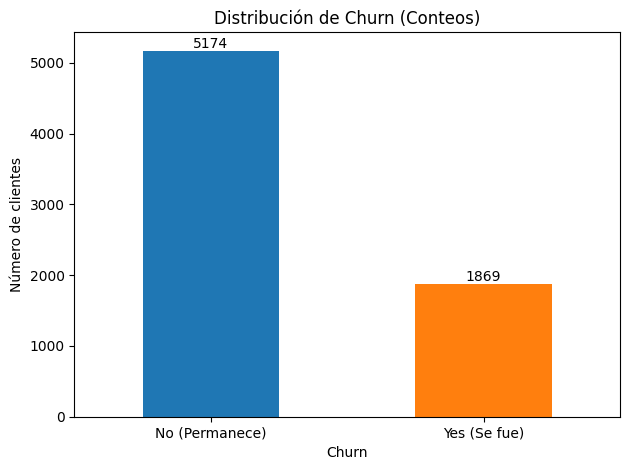

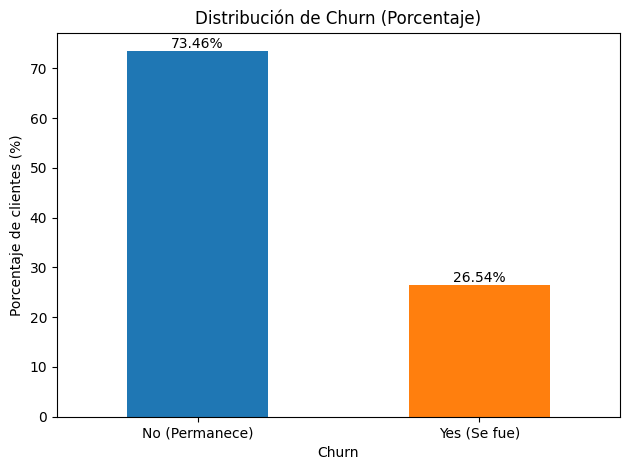

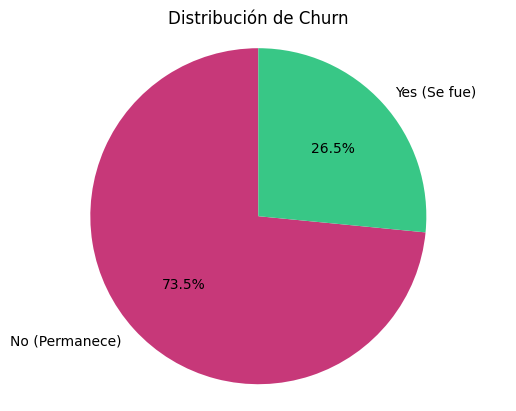

In [17]:

import matplotlib.pyplot as plt

# Asegurar formato 0/1 para churn
churn_series = df_clean["Churn"].replace({"Yes": 1, "No": 0}).astype(int)
counts = churn_series.value_counts().sort_index()
percent = (counts / counts.sum() * 100).round(2)

# Colores personalizados
colores_barras = ["#1f77b4", "#ff7f0e"]  # Azul y naranja
colores_pie = ["#c73879", "#38C786"]     # Verde y rojo

# === 1) Conteos ===
plt.figure()
ax1 = counts.plot(kind="bar", color=colores_barras)
ax1.set_xticklabels(["No (Permanece)", "Yes (Se fue)"], rotation=0)
ax1.set_title("Distribución de Churn (Conteos)")
ax1.set_xlabel("Churn")
ax1.set_ylabel("Número de clientes")
for p in ax1.patches:
    ax1.annotate(f"{int(p.get_height())}",
                 (p.get_x()+p.get_width()/2, p.get_height()),
                 ha="center", va="bottom")
plt.tight_layout()
plt.show()

# === 2) Porcentajes ===
plt.figure()
ax2 = percent.plot(kind="bar", color=colores_barras)
ax2.set_xticklabels(["No (Permanece)", "Yes (Se fue)"], rotation=0)
ax2.set_title("Distribución de Churn (Porcentaje)")
ax2.set_xlabel("Churn")
ax2.set_ylabel("Porcentaje de clientes (%)")
for i, v in enumerate(percent):
    ax2.annotate(f"{v}%", (i, v), ha="center", va="bottom")
plt.tight_layout()
plt.show()

# === 3) Gráfico de torta ===
plt.figure()
plt.pie([counts.get(0,0), counts.get(1,0)],
        labels=["No (Permanece)", "Yes (Se fue)"],
        colors=colores_pie,
        autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Churn")
plt.axis("equal")
plt.show()



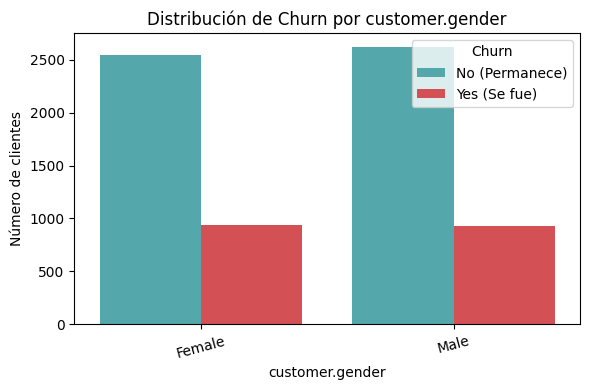

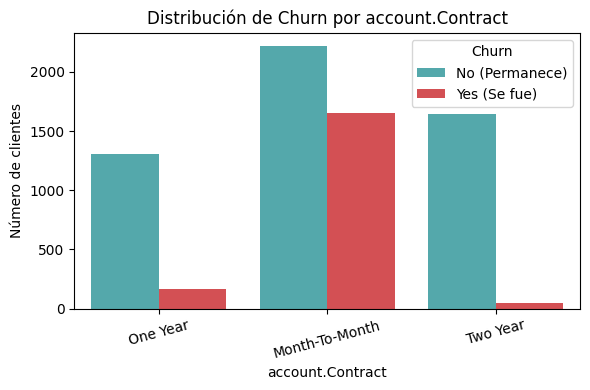

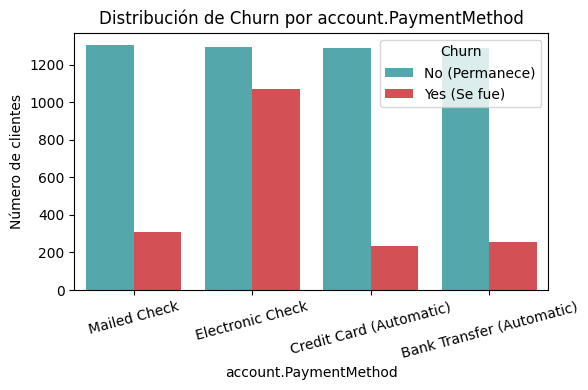

In [20]:
import seaborn as sns

# Variables categóricas a analizar
categoricas = [
    "customer.gender",
    "account.Contract",
    "account.PaymentMethod"
]

# Colores personalizados
colores = ["#45B6BA", "#E93A40"]  # Azul = No, Naranja = Yes

# Crear gráficos
for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_clean, x=col, hue="Churn", palette=colores)
    plt.title(f"Distribución de Churn por {col}")
    plt.xlabel(col)
    plt.ylabel("Número de clientes")
    plt.legend(title="Churn", labels=["No (Permanece)", "Yes (Se fue)"])
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-1739111062.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="Churn", y=col, palette=colores)


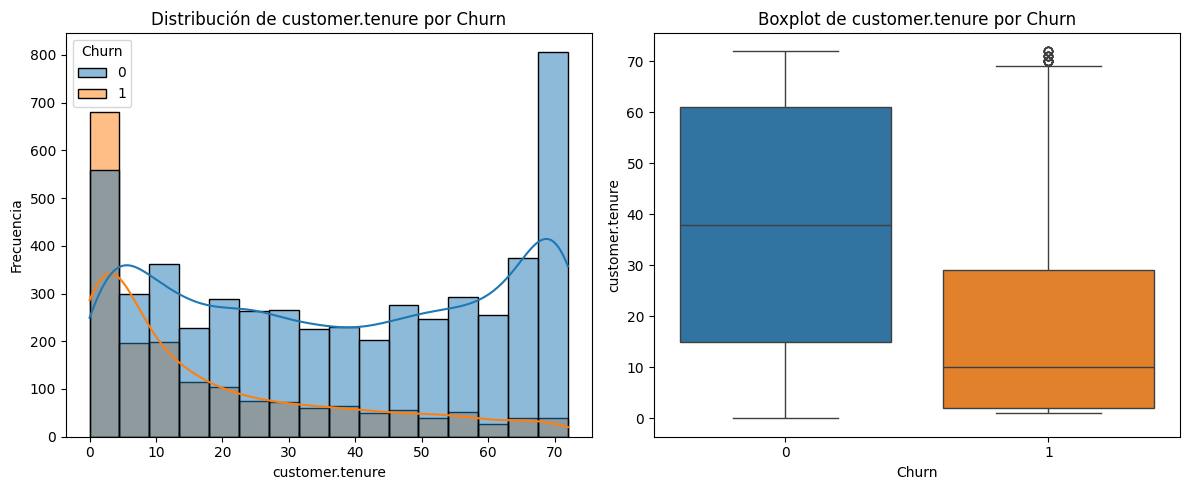

/tmp/ipython-input-1739111062.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="Churn", y=col, palette=colores)


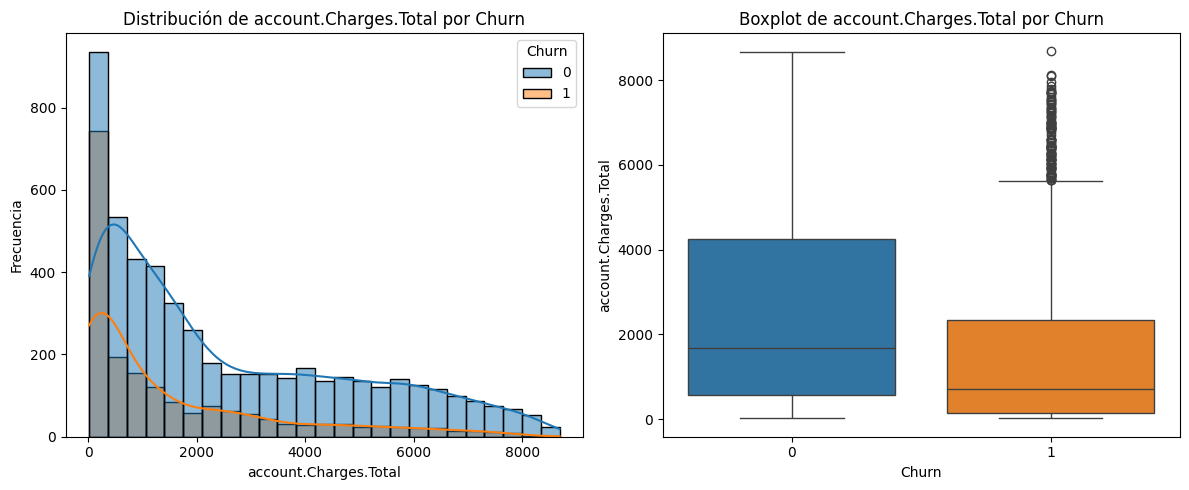

/tmp/ipython-input-1739111062.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="Churn", y=col, palette=colores)


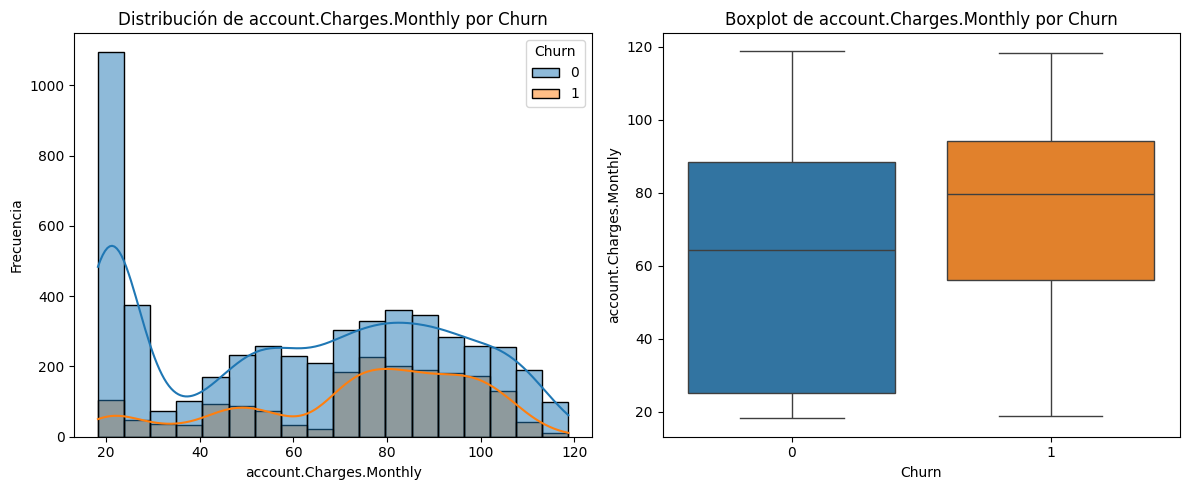

In [26]:

# Variables numéricas a analizar
numericas = [
    "customer.tenure",         # Tiempo de contrato
    "account.Charges.Total",   # Total gastado
    "account.Charges.Monthly"  # Gasto mensual
]

# Colores personalizados
colores = ["#1f77b4", "#ff7f0e"]

for col in numericas:
    plt.figure(figsize=(12,5))

    # Histograma / Densidad
    plt.subplot(1,2,1)
    sns.histplot(data=df_clean, x=col, hue="Churn", kde=True, palette=colores, alpha=0.5)
    plt.title(f"Distribución de {col} por Churn")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df_clean, x="Churn", y=col, palette=colores)
    plt.title(f"Boxplot de {col} por Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()


#📄Informe final


#**Informe Final: Análisis de Evasión de Clientes (Churn)**
1. *Introducción*
El presente análisis tiene como objetivo comprender el fenómeno de la evasión de clientes (Churn) en una empresa de telecomunicaciones. El churn se define como la proporción de clientes que cancelan su servicio en un período determinado.
El propósito es identificar patrones y factores asociados a la cancelación, con el fin de proponer estrategias que contribuyan a reducir la pérdida de clientes.

2. *Limpieza y Tratamiento de Datos*
Los pasos realizados fueron:

Importación de datos desde archivo CSV y verificación de estructura inicial.

Eliminación de duplicados para evitar sesgos.

Conversión de tipos de datos (por ejemplo, pasar valores numéricos en texto a float).

Imputación de valores faltantes usando la media en variables numéricas.

Estandarización de valores categóricos para consistencia.

Transformación de variables textuales (“Yes”/“No”) a formato binario (1/0) para facilitar análisis.

Creación de la nueva columna Cuentas_Diarias, calculada como facturación mensual / 30 días.

3. *Análisis Exploratorio de Datos*
Distribución de Churn:
El 26.53% de los clientes canceló el servicio, mientras que el 73.46% permaneció.

Variables categóricas:
Se observó mayor churn en clientes con contrato mensual y pagos electrónicos.

Variables numéricas:
Clientes con menor tiempo de permanencia (tenure) y menor gasto total (Charges.Total) presentaron mayor evasión.

Correlaciones:
El churn mostró correlaciones negativas con el tiempo de permanencia (-0.35) y gasto total (-0.20), lo que sugiere que clientes más nuevos o con menor gasto son más propensos a cancelar.

Se utilizaron gráficos de barras, pie charts y boxplots para visualizar patrones de evasión por variables categóricas y numéricas.

4. *Conclusiones e Insights*
Los clientes con contrato mensual y pagos vía Electronic Check tienen una mayor probabilidad de cancelar.

La fidelización mejora con mayor tiempo de permanencia y gasto acumulado.

La ausencia de servicios adicionales como Online Security o Tech Support está asociada a mayor evasión.

El patrón sugiere que la retención temprana (primeros meses) es clave para reducir la fuga.

5. *Recomendaciones*
Programas de retención temprana: Descuentos o beneficios especiales en los primeros 6 meses.

Promociones para contratos anuales que reduzcan la proporción de clientes mensuales.

Campañas de cross-selling para fomentar la adopción de servicios adicionales (ej. seguridad en línea, soporte técnico).

Mejorar la experiencia de pago en métodos electrónicos, abordando posibles fricciones.